<a href="https://colab.research.google.com/github/StevennZZZ/FormalizingMATH300/blob/main/Homework4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
<center>CFRM 421/521, Spring 2023</center>
</h1>

<h1>
<center>[Insert your name here]</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Wednesday, May 27, 2024, 11:59 PM**


* Total marks: 43


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [12 marks]

Consider the original source of the California housing data (used in Homework 2) in Scikit-Learn.  The data is obtained and split using the code below, where we split off 20% as the test set, and then split off 20% of the training set as a validation set, and keep the remaining 80% of the training set as the actual training set. The following code creates the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`.

In [136]:
from google.colab import files

uploaded = files.upload()

Saving bank_cleaned.csv to bank_cleaned (2).csv


In [137]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with a normalization layer as the first layer (`tf.keras.layers.Normalization(input_shape=X_train.shape[1:])`), and one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set. In the `.compile()` method, use `loss="mse"`.

**[Add your solution here]**

In [138]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="relu", kernel_initializer="he_normal")
])
model.compile(loss="mse", optimizer="nadam")
run = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),verbose=1)

mse_relu = model.evaluate(X_valid, y_valid)
print(f'MSE with ReLU activation in output layer: {mse_relu}')

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 2428.2869 - val_loss: 5.7523
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5894 - val_loss: 5.7480
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5883 - val_loss: 5.7484
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5884 - val_loss: 5.7484
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5891 - val_loss: 5.7472
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5885 - val_loss: 5.7511
Epoch 7/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5882 - val_loss: 5.7503
Epoch 8/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5878 - val_loss: 5.7459
Epoch 9/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5859 - val_loss: 5.7513
Epoch 10/30
413/413 [==============================] - 1s 2ms/step - loss: 5.5871 - val_loss: 5.7

In [139]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu",
                kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation=None)
])
model.compile(loss="mse", optimizer="nadam")
run = model.fit(X_train, y_train, epochs=30,
         validation_data=(X_valid, y_valid))

mse_identity = model.evaluate(X_valid, y_valid)
print(f'MSE with no activation function in output layer: {mse_identity}')

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 29016.4512 - val_loss: 9.0850
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 4.4629 - val_loss: 4.9447
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 2.4768 - val_loss: 3.1734
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 1.7978 - val_loss: 2.3547
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 1.2987 - val_loss: 1.9404
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 1.1012 - val_loss: 1.8665
Epoch 7/30
413/413 [==============================] - 1s 2ms/step - loss: 0.9817 - val_loss: 1.4625
Epoch 8/30
413/413 [==============================] - 1s 3ms/step - loss: 0.9474 - val_loss: 1.4674
Epoch 9/30
413/413 [==============================] - 1s 3ms/step - loss: 0.9148 - val_loss: 1.5403
Epoch 10/30
413/413 [==============================] - 1s 3ms/step - loss: 0.8562 - val_loss: 1.

In [140]:
mse_df = pd.DataFrame({
    "Activation Function": ["ReLU", "None"],
    "MSE": [mse_relu, mse_identity]
})

mse_df

,Activation Function,MSE
0,ReLU,5.723075
1,None,1.366871


## (b) [6 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) on the textbook website using Keras Tuner. You will need to install the package `keras_tuner` if you don't already have it.

Then use Keras Tuner to do a randomized search to search for the best hyperparameters. Do the randomized search over the first 5000 observations of the training set. Use 20 iterations, 20 epochs per iteration. Use the same network architecture as (a) except where otherwise specified below. Use no activation function for the output layer. Use a seed of 42, and the objective is clearly to minimize validation loss. The hyperparameters to search over are:

* Hidden layers: 1 to 5.
* Number of neurons per layer: 1 to 100.
* Learning rate: 1e-4 to 1e-2 using log sampling.
* $\ell_2$ regularizers with `l2` value: 1e-4 to 100 using log sampling.
* Optimizer: `tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)` and `tf.keras.optimizers.Nadam(learning_rate=learning_rate)`.

Print the best hyperparameter. (You can ignore any warning message you may get).

**[Add your solution here]**

In [141]:
!pip install keras-tuner


In [142]:
import keras_tuner as kt

reset_session()

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5)
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=100)
    learning_rate = hp.Float("learning_rate", min_value=1e-4,
                  max_value=1e-2,sampling="log")
    reg = hp.Float("l2", min_value=1e-4,
            max_value=100,sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "nadam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Normalization(input_shape=X_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,  activation="relu", kernel_initializer="he_normal",
             kernel_regularizer=tf.keras.regularizers.l2(reg)))
    model.add(tf.keras.layers.Dense(1,activation=None, kernel_initializer="he_normal",
         kernel_regularizer=tf.keras.regularizers.l2(reg)))
    model.compile(loss="mse", optimizer="Nadam")
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_loss", max_trials=20, overwrite=True,
    directory="calorif_housing", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train[:5000], y_train[:5000], epochs=20,
                           validation_data=(X_valid, y_valid))

Trial 20 Complete [00h 00m 13s]
val_loss: 68.51395416259766

Best val_loss So Far: 1.4804799556732178
Total elapsed time: 00h 06m 06s


In [143]:
random_search_tuner.get_best_hyperparameters(num_trials=1)[0].values

{'n_hidden': 3,
 'n_neurons': 4,
 'learning_rate': 0.0003032990167232719,
 'l2': 23.736367100254395,
 'optimizer': 'nadam'}

In [144]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]
best_model.summary()

Model: "sequential"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        


                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 


 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 98 (396.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


## (c) [2 marks]

For the best model in (b), train the model on the full training data for 200 epochs. Plot the learning curve. Does it look like the model is overfitting?

**[Add your solution here]**

In [145]:
reset_session()

In [146]:
best_run_c = best_model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
413/413 [==============================] - 5s 5ms/step - loss: 1.3730 - val_loss: 1.4091
Epoch 2/200
413/413 [==============================] - 2s 4ms/step - loss: 1.3378 - val_loss: 1.3899
Epoch 3/200
413/413 [==============================] - 2s 5ms/step - loss: 1.3289 - val_loss: 1.3836
Epoch 4/200
413/413 [==============================] - 3s 7ms/step - loss: 1.3266 - val_loss: 1.3813
Epoch 5/200
413/413 [==============================] - 2s 5ms/step - loss: 1.3261 - val_loss: 1.3808
Epoch 6/200
413/413 [==============================] - 2s 4ms/step - loss: 1.3260 - val_loss: 1.3807
Epoch 7/200
413/413 [==============================] - 2s 5ms/step - loss: 1.3259 - val_loss: 1.3805
Epoch 8/200
413/413 [==============================] - 2s 4ms/step - loss: 1.3260 - val_loss: 1.3805
Epoch 9/200
413/413 [==============================] - 2s 6ms/step - loss: 1.3260 - val_loss: 1.3807
Epoch 10/200
413/413 [==============================] - 2s 6ms/step - loss: 1.3260 - val_lo

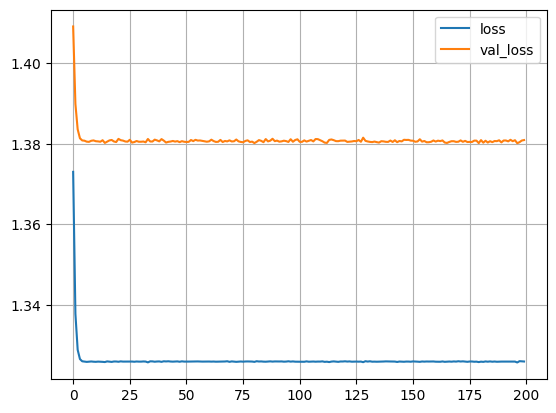

In [147]:
import matplotlib.pyplot as plt

pd.DataFrame(best_run_c.history).plot()
plt.grid(True)
plt.show()

# 2. Binary classification DNN [17 marks]

Consider the [Portuguese Bank Marketing Data Set](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv) available at Kaggle. Download the `bank_cleaned.csv` file or from [Canvas](https://canvas.uw.edu/files/106328167/download?download_frd=1). Here we want to predict the success or failure of a bank marketing campaign using phone calls to promote a term deposit product. The target variable is `response_binary`.

The following code preprocesses the data. The day and month have been converted into cyclical features(1st day of the month has equal distance to the 2nd and the 31st).

In [148]:
df = pd.read_csv("bank_cleaned.csv")

month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
day_rad = (df["day"] - 1) * (2 * np.pi / 31)
month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)
df["day_sin"] = np.sin(day_rad)
df["day_cos"] = np.cos(day_rad)
df["month_sin"] = np.sin(month_rad)
df["month_cos"]  = np.cos(month_rad)
df.drop(columns=["Unnamed: 0", "month", "day", "response"], axis=1, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response_binary,day_sin,day_cos,month_sin,month_cos
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
1,44,technician,single,secondary,no,29,yes,no,2.52,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
3,35,management,married,tertiary,no,231,yes,no,2.32,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
4,28,management,single,tertiary,no,447,yes,yes,3.62,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5


In [149]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_set_tmp, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, valid_set = train_test_split(train_set_tmp, test_size=0.2, random_state=42)

X_train_raw = train_set.drop("response_binary", axis=1).copy()
y_train = train_set["response_binary"].copy()
X_valid_raw = valid_set.drop("response_binary", axis=1).copy()
y_valid = valid_set["response_binary"].copy()
X_test_raw = test_set.drop("response_binary", axis=1).copy()
y_test = test_set["response_binary"].copy()

num_attribs = list(X_train_raw._get_numeric_data().columns)
cat_attribs = list(set(X_train_raw.columns) - set(num_attribs))

cat_attribs_ord = ['default', 'housing', 'loan']
cat_attribs_hot = ['job', 'marital', 'education', 'poutcome']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat_hot", OneHotEncoder(), cat_attribs_hot),
        ("cat_ord", OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes']]), cat_attribs_ord)
    ])

X_train = full_pipeline.fit_transform(X_train_raw)
X_valid = full_pipeline.transform(X_valid_raw)
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

In the next part you will build and fit a DNN with 4 hidden layers of 100 neurons each. Use the following specifications:

(i) He initialization and the Swish activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]`.

Explain why the choices (i), (ii), and (iii) are justified.

Also, state the proportion of sucesses in the training data.

**[Add your solution here]**

### Justifications for Model Configuration

#### (i) He Initialization and Swish Activation

- **Swish Activation**: This activation function is optimal due to its ability to manage gradient issues more effectively compared to traditional functions like ReLU. Its continuous and smooth curve helps maintain active gradients throughout training, improving the model's capacity to learn complex patterns.

- **He Initialization**: Ideal for layers with Swish or ReLU activations, He initialization helps maintain a consistent variance in neurons' outputs across different layers, which is crucial for stabilizing the gradient distributions in deep neural networks.

#### (ii) Sigmoid Activation in Output Layer

- **Sigmoid Function**: For binary classification tasks, the sigmoid function transforms the output into a probability score between 0 and 1. This is particularly useful for models where the output needs to reflect a probability of belonging to the default class, effectively categorizing the input into one of two possible classes based on a 0.5 threshold.

#### (iii) Binary Crossentropy Loss and AUC Metric

- **Binary Crossentropy**: This loss function is quintessential for binary classification as it compares the predicted probabilities directly with the actual binary labels, effectively measuring the error in probability terms.

- **AUC Metric**: The AUC metric is superior in scenarios with imbalanced data. It assesses the model's capability to distinguish between classes without being biased towards the majority class, unlike accuracy which might be misleading in imbalanced situations.

#### Proportion of Positive Instances in Training Data

The training data's composition in terms of positive instances (labelled as "1") is critical for determining the initial effectiveness of the model and understanding how well the model might perform with naive predictions.


In [150]:
sum(y_train==1)/len(y_train)

0.11168075907717029

## (b) [3 marks]

Train the model in (a) for 30 epochs and use exponential scheduling using the function below (`lr0=0.01`, `s=20`) and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

In [151]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)

**[Add your solution here]**

In [152]:
reset_session()

model = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model.add(tf.keras.layers.Dense(n_hidden, activation="swish",
         kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay(lr0=0.01,s=20))
run_2b = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/30
817/817 [==============================] - 5s 4ms/step - loss: 0.2425 - auc: 0.8784 - val_loss: 0.2265 - val_auc: 0.8982 - lr: 0.0100
Epoch 2/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2193 - auc: 0.9056 - val_loss: 0.2216 - val_auc: 0.9007 - lr: 0.0089
Epoch 3/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2142 - auc: 0.9113 - val_loss: 0.2187 - val_auc: 0.9052 - lr: 0.0079
Epoch 4/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2102 - auc: 0.9150 - val_loss: 0.2172 - val_auc: 0.9069 - lr: 0.0071
Epoch 5/30
817/817 [==============================] - 3s 3ms/step - loss: 0.2072 - auc: 0.9187 - val_loss: 0.2128 - val_auc: 0.9110 - lr: 0.0063
Epoch 6/30
817/817 [==============================] - 4s 5ms/step - loss: 0.2040 - auc: 0.9216 - val_loss: 0.2141 - val_auc: 0.9104 - lr: 0.0056
Epoch 7/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2022 - auc: 0.9228 - val_loss: 0.2094 - val_auc: 0.914

<Figure size 640x480 with 0 Axes>

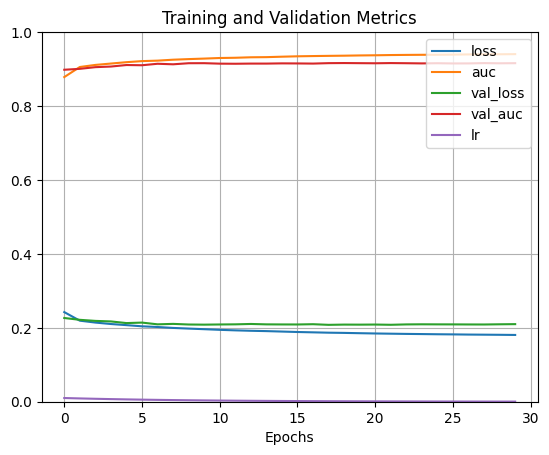

In [153]:
run_history = {key: run_2b.history[key] for key in list(run_2b.history.keys())}

history_df = pd.DataFrame(run_history)

plt.figure()
history_df.plot()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

## (c) [8 marks]

Fit separate models using the same specification as in (b) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.0002`,

(iv) dropout with probability 0.02,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (b), and for each of the models here comment on whether it is better than the model in (b).

**[Add your solution here]**

(1) batch normalization,

In [154]:
reset_session()

In [155]:
model_bn = tf.keras.models.Sequential()
model_bn.add(tf.keras.layers.BatchNormalization())
for n_hidden in (100, 100, 100, 100):
    model_bn.add(tf.keras.layers.Dense(n_hidden, activation="swish",
           kernel_initializer="he_normal"))
    model_bn.add(tf.keras.layers.BatchNormalization())
model_bn.add(tf.keras.layers.Dense(1, activation="sigmoid"))
optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model_bn.compile(loss="binary_crossentropy",
                 optimizer=optimizer,
                 metrics=["AUC"])
run = model_bn.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/30
817/817 [==============================] - 6s 5ms/step - loss: 0.2712 - auc: 0.8446 - val_loss: 0.2449 - val_auc: 0.8772 - lr: 0.0100
Epoch 2/30
817/817 [==============================] - 4s 5ms/step - loss: 0.2318 - auc: 0.8931 - val_loss: 0.2325 - val_auc: 0.8905 - lr: 0.0089
Epoch 3/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2250 - auc: 0.9008 - val_loss: 0.2250 - val_auc: 0.8983 - lr: 0.0079
Epoch 4/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2207 - auc: 0.9052 - val_loss: 0.2281 - val_auc: 0.8979 - lr: 0.0071
Epoch 5/30
817/817 [==============================] - 4s 5ms/step - loss: 0.2178 - auc: 0.9082 - val_loss: 0.2233 - val_auc: 0.9004 - lr: 0.0063
Epoch 6/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2134 - auc: 0.9131 - val_loss: 0.2245 - val_auc: 0.9006 - lr: 0.0056
Epoch 7/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2107 - auc: 0.9151 - val_loss: 0.2224 - val_auc: 0.903

<Figure size 640x480 with 0 Axes>

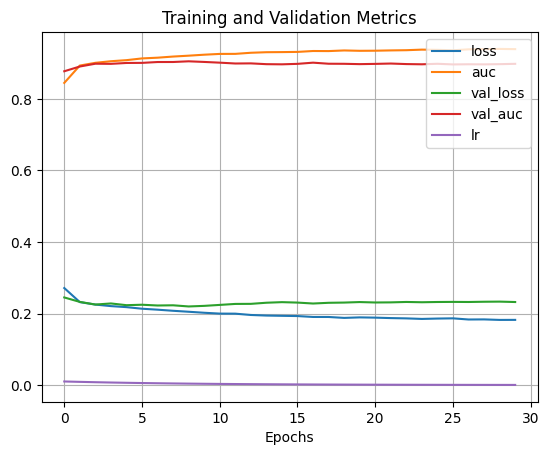

In [156]:
run_history = {key: run.history[key] for key in list(run.history.keys())}

history_df = pd.DataFrame(run_history)

plt.figure()
history_df.plot()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Compared to Validation AUG, the situation is worse.

(2) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

In [157]:
reset_session()

In [158]:
model_es = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model_es.add(tf.keras.layers.Dense(n_hidden, activation="swish",
           kernel_initializer="he_normal"))
model_es.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
early_stopping_cii = tf.keras.callbacks.EarlyStopping(patience=10,
            restore_best_weights=True,monitor="val_auc", mode="max")
model_es.compile(loss="binary_crossentropy",
                 optimizer=optimizer,
                 metrics=["AUC"])
run = model_es.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cii, lr_scheduler])

Epoch 1/30
817/817 [==============================] - 6s 6ms/step - loss: 0.2434 - auc: 0.8776 - val_loss: 0.2269 - val_auc: 0.8980 - lr: 0.0100
Epoch 2/30
817/817 [==============================] - 3s 3ms/step - loss: 0.2176 - auc: 0.9074 - val_loss: 0.2187 - val_auc: 0.9045 - lr: 0.0089
Epoch 3/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2113 - auc: 0.9140 - val_loss: 0.2164 - val_auc: 0.9087 - lr: 0.0079
Epoch 4/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2074 - auc: 0.9178 - val_loss: 0.2127 - val_auc: 0.9115 - lr: 0.0071
Epoch 5/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2041 - auc: 0.9214 - val_loss: 0.2098 - val_auc: 0.9147 - lr: 0.0063
Epoch 6/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2016 - auc: 0.9236 - val_loss: 0.2101 - val_auc: 0.9150 - lr: 0.0056
Epoch 7/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2000 - auc: 0.9250 - val_loss: 0.2068 - val_auc: 0.917

<Figure size 640x480 with 0 Axes>

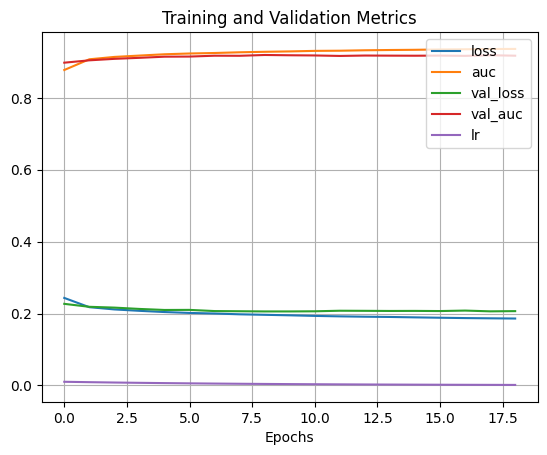

In [159]:
run_history = {key: run.history[key] for key in list(run.history.keys())}

history_df = pd.DataFrame(run_history)

plt.figure()
history_df.plot()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Compared to Validation AUG, the situation is better.

(3) $\ell_2$ regularization with `l2=0.0002`

In [160]:
reset_session()

In [161]:
model_l2 = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model_l2.add(tf.keras.layers.Dense(n_hidden, activation="swish",
           kernel_initializer="he_normal",
           kernel_regularizer=tf.keras.regularizers.l2(0.0002)))
model_l2.add(tf.keras.layers.Dense(1, activation="sigmoid",
       kernel_regularizer=tf.keras.regularizers.l2(0.0002)))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model_l2.compile(loss="binary_crossentropy",
                 optimizer=optimizer,
                 metrics=["AUC"])
run = model_l2.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/30
817/817 [==============================] - 4s 3ms/step - loss: 0.3973 - auc: 0.8806 - val_loss: 0.3784 - val_auc: 0.8980 - lr: 0.0100
Epoch 2/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3657 - auc: 0.9070 - val_loss: 0.3655 - val_auc: 0.9009 - lr: 0.0089
Epoch 3/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3540 - auc: 0.9116 - val_loss: 0.3556 - val_auc: 0.9046 - lr: 0.0079
Epoch 4/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3452 - auc: 0.9144 - val_loss: 0.3484 - val_auc: 0.9062 - lr: 0.0071
Epoch 5/30
817/817 [==============================] - 3s 4ms/step - loss: 0.3382 - auc: 0.9166 - val_loss: 0.3421 - val_auc: 0.9077 - lr: 0.0063
Epoch 6/30
817/817 [==============================] - 3s 4ms/step - loss: 0.3320 - auc: 0.9180 - val_loss: 0.3403 - val_auc: 0.9072 - lr: 0.0056
Epoch 7/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3276 - auc: 0.9184 - val_loss: 0.3323 - val_auc: 0.910

<Figure size 640x480 with 0 Axes>

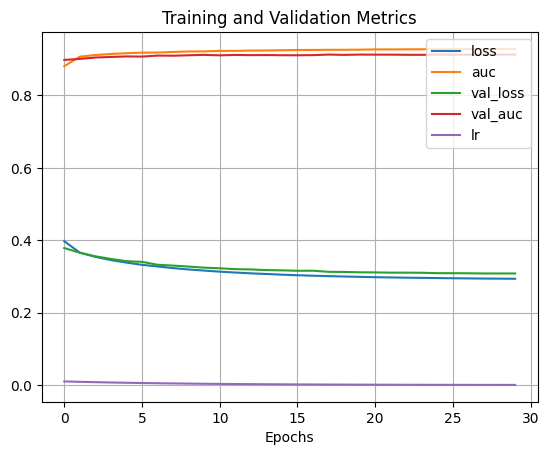

In [162]:
run_history = {key: run.history[key] for key in list(run.history.keys())}

history_df = pd.DataFrame(run_history)

plt.figure()
history_df.plot()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Compared to Validation AUG, the situation is worse.

(4) dropout with probability 0.02

In [163]:
reset_session()

In [164]:
model_dr = tf.keras.models.Sequential()
model_dr.add(tf.keras.layers.Dropout(rate=0.02))
for n_hidden in (100, 100, 100, 100):
    model_dr.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                       kernel_initializer="he_normal"))
    model_dr.add(tf.keras.layers.Dropout(rate=0.02))
model_dr.add(tf.keras.layers.Dense(1, activation="sigmoid"))
optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model_dr.compile(loss="binary_crossentropy",
                 optimizer=optimizer,
                 metrics=["AUC"])
run = model_dr.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/30
817/817 [==============================] - 4s 3ms/step - loss: 0.2520 - auc: 0.8649 - val_loss: 0.2257 - val_auc: 0.8988 - lr: 0.0100
Epoch 2/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2227 - auc: 0.9015 - val_loss: 0.2192 - val_auc: 0.9042 - lr: 0.0089
Epoch 3/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2177 - auc: 0.9072 - val_loss: 0.2148 - val_auc: 0.9090 - lr: 0.0079
Epoch 4/30
817/817 [==============================] - 3s 3ms/step - loss: 0.2134 - auc: 0.9118 - val_loss: 0.2144 - val_auc: 0.9085 - lr: 0.0071
Epoch 5/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2114 - auc: 0.9137 - val_loss: 0.2108 - val_auc: 0.9128 - lr: 0.0063
Epoch 6/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2101 - auc: 0.9151 - val_loss: 0.2112 - val_auc: 0.9127 - lr: 0.0056
Epoch 7/30
817/817 [==============================] - 2s 3ms/step - loss: 0.2077 - auc: 0.9172 - val_loss: 0.2080 - val_auc: 0.915

<Figure size 640x480 with 0 Axes>

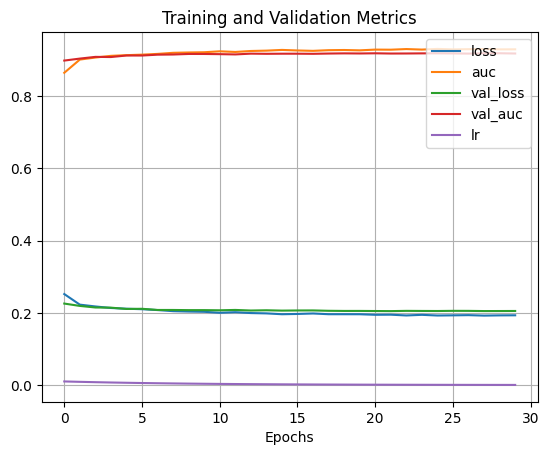

In [165]:
run_history = {key: run.history[key] for key in list(run.history.keys())}

history_df = pd.DataFrame(run_history)

plt.figure()
history_df.plot()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Compared to Validation AUG, the situation is better.

(5) $\ell_2$ regularization and early stopping both as above

In [166]:
reset_session()

In [167]:
model_l2es = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model_l2es.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                        kernel_initializer="he_normal",
                        kernel_regularizer=tf.keras.regularizers.l2(0.0002)))
model_l2es.add(tf.keras.layers.Dense(1, activation="sigmoid",
                        kernel_regularizer=tf.keras.regularizers.l2(0.0002)))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                              restore_best_weights=True,
                              monitor="val_auc", mode="max")
model_l2es.compile(loss="binary_crossentropy",
                   optimizer=optimizer,
                   metrics=["AUC"])
run = model_l2es.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid),
                     callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
817/817 [==============================] - 4s 3ms/step - loss: 0.3946 - auc: 0.8810 - val_loss: 0.3777 - val_auc: 0.8954 - lr: 0.0100
Epoch 2/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3645 - auc: 0.9057 - val_loss: 0.3647 - val_auc: 0.8995 - lr: 0.0089
Epoch 3/30
817/817 [==============================] - 3s 3ms/step - loss: 0.3526 - auc: 0.9110 - val_loss: 0.3561 - val_auc: 0.9038 - lr: 0.0079
Epoch 4/30
817/817 [==============================] - 3s 4ms/step - loss: 0.3434 - auc: 0.9143 - val_loss: 0.3496 - val_auc: 0.9039 - lr: 0.0071
Epoch 5/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3364 - auc: 0.9163 - val_loss: 0.3426 - val_auc: 0.9079 - lr: 0.0063
Epoch 6/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3300 - auc: 0.9186 - val_loss: 0.3383 - val_auc: 0.9072 - lr: 0.0056
Epoch 7/30
817/817 [==============================] - 2s 3ms/step - loss: 0.3254 - auc: 0.9192 - val_loss: 0.3320 - val_auc: 0.909

<Figure size 640x480 with 0 Axes>

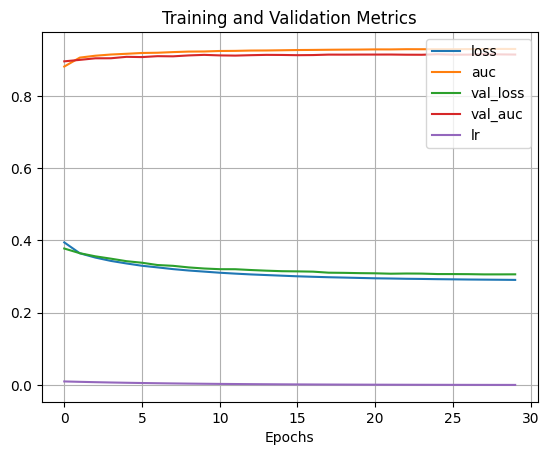

In [168]:
run_history = {key: run.history[key] for key in list(run.history.keys())}

history_df = pd.DataFrame(run_history)

plt.figure()
history_df.plot()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Compared to Validation AUG, the situation is worse.

(6) batch normalization and dropout both as above

In [169]:
reset_session()

In [170]:
model_bndr = tf.keras.models.Sequential()
model_bndr.add(tf.keras.layers.BatchNormalization())
model_bndr.add(tf.keras.layers.Dropout(rate=0.02))
for n_hidden in (100, 100, 100, 100):
    model_bndr.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                        kernel_initializer="he_normal"))
    model_bndr.add(tf.keras.layers.BatchNormalization())
    model_bndr.add(tf.keras.layers.Dropout(rate=0.2))
model_bndr.add(tf.keras.layers.Dense(1, activation="sigmoid"))
optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model_bndr.compile(loss="binary_crossentropy",
                   optimizer=optimizer,
                   metrics=["AUC"])
run = model_bndr.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid),
                     callbacks=[lr_scheduler])

Epoch 1/30
817/817 [==============================] - 7s 5ms/step - loss: 0.2957 - auc: 0.8054 - val_loss: 0.2372 - val_auc: 0.8836 - lr: 0.0100
Epoch 2/30
817/817 [==============================] - 4s 5ms/step - loss: 0.2538 - auc: 0.8647 - val_loss: 0.2312 - val_auc: 0.8909 - lr: 0.0089
Epoch 3/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2496 - auc: 0.8706 - val_loss: 0.2298 - val_auc: 0.8928 - lr: 0.0079
Epoch 4/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2465 - auc: 0.8749 - val_loss: 0.2335 - val_auc: 0.8942 - lr: 0.0071
Epoch 5/30
817/817 [==============================] - 4s 4ms/step - loss: 0.2410 - auc: 0.8812 - val_loss: 0.2290 - val_auc: 0.8957 - lr: 0.0063
Epoch 6/30
817/817 [==============================] - 4s 5ms/step - loss: 0.2430 - auc: 0.8789 - val_loss: 0.2252 - val_auc: 0.8992 - lr: 0.0056
Epoch 7/30
817/817 [==============================] - 3s 4ms/step - loss: 0.2406 - auc: 0.8817 - val_loss: 0.2240 - val_auc: 0.899

<Figure size 640x480 with 0 Axes>

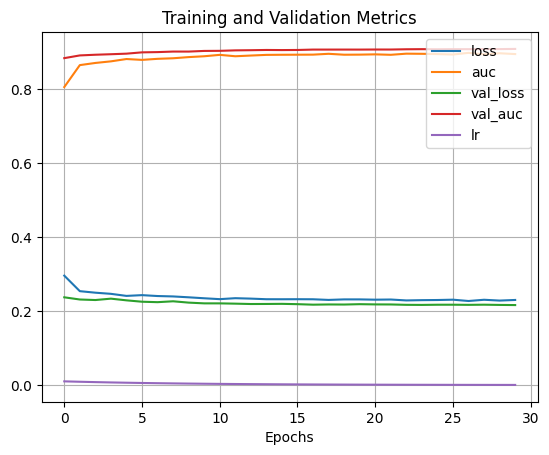

In [171]:
run_history = {key: run.history[key] for key in list(run.history.keys())}

history_df = pd.DataFrame(run_history)

plt.figure()
history_df.plot()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Compared to Validation AUG, the situation is worse.

## (d) [1 mark]

For the dropout model in (c)(iv) determine whether or not it is overfitting less than the model in (b).

**[Add your solution here]**

In [172]:
model_dr

In [173]:
model_dr.evaluate(X_train, y_train)

817/817 [==============================] - 1s 2ms/step - loss: 0.1833 - auc: 0.9391


[0.1832573264837265, 0.9391189813613892]

In [174]:
model_dr.evaluate(X_valid, y_valid)

205/205 [==============================] - 0s 2ms/step - loss: 0.2052 - auc: 0.9183


[0.20518158376216888, 0.9183346629142761]

## (e) [1 mark]

Of the models in (b) and (c), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (c)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

**[Add your solution here]**

In [175]:
model_l2es

In [176]:
# AUC
model_l2es.evaluate(X_test, y_test)

256/256 [==============================] - 1s 2ms/step - loss: 0.3054 - auc: 0.9283


[0.30541476607322693, 0.9282727837562561]

In [177]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_train_pred = (model_l2es.predict(X_test) >= 0.5)
confusion_matrix(y_test, y_train_pred)

256/256 [==============================] - 0s 1ms/step


array([[6947,  219],
       [ 573,  430]])

# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2023, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/106328118/download?download_frd=1).

In [178]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2023,1,1))

## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

**[Add your solution here]**

In [179]:
data = data.dropna()

In [180]:
def ts_split(ts, feature_steps=8, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps]
                  for idx in range(n_obs)])
    return X, y

In [181]:
time_steps = 10

ts = data.values.flatten()
X, y = ts_split(ts, feature_steps=time_steps)

train_idx = sum(data.index.year < 2010) - time_steps
valid_idx = sum(data.index.year < 2016) - time_steps

X_train, y_train = X[:train_idx], y[:train_idx]
X_valid, y_valid = X[train_idx:valid_idx], y[train_idx:valid_idx]
X_test, y_test = X[valid_idx:], y[valid_idx:]

In [182]:
X_train

array([[146.25, 145.7 , 143.37, ..., 145.4 , 145.4 , 145.48],
       [145.7 , 143.37, 143.82, ..., 145.4 , 145.48, 145.49],
       [143.37, 143.82, 144.1 , ..., 145.48, 145.49, 146.12],
       ...,
       [ 88.65,  89.91,  89.52, ...,  91.52,  91.69,  91.57],
       [ 89.91,  89.52,  90.35, ...,  91.69,  91.57,  91.95],
       [ 89.52,  90.35,  90.47, ...,  91.57,  91.95,  92.66]])

In [183]:
y_train

array([[145.49],
       [146.12],
       [145.65],
       ...,
       [ 91.95],
       [ 92.66],
       [ 93.08]])

## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

In [184]:
movement_test = X_test[:,-1] < y_test.ravel()

**[Add your solution here]**

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [186]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train.ravel())

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5271643620377792


In [187]:
actual_movement = X_test[:,-1] < y_test.ravel()
predicted_movement = X_test[:,-1] < y_pred

accuracy = accuracy_score(actual_movement, predicted_movement)
print(f"Accuracy of Movement Direction: {accuracy}")

Accuracy of Movement Direction: 0.5203205495134516


## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

**[Add your solution here]**

In [188]:
reset_session()

In [189]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="nadam")
run = model.fit(X_train[..., np.newaxis], y_train, epochs=100, validation_data=(X_valid[..., np.newaxis], y_valid))

Epoch 1/100
157/157 [==============================] - 4s 8ms/step - loss: 12269.5459 - val_loss: 7788.1128
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 11248.6963 - val_loss: 7176.9414
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 10535.3760 - val_loss: 6629.7427
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 9876.6904 - val_loss: 6121.9507
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 9256.4346 - val_loss: 5646.0796
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 8669.0078 - val_loss: 5198.5879
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 8111.3018 - val_loss: 4777.6118
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 7581.2720 - val_loss: 4381.3521
Epoch 9/100
157/157 [==============================] - 1s 7ms/step - loss: 7077.4229 - val_loss: 4008.9971
Epoch 10/100
157/157 [============

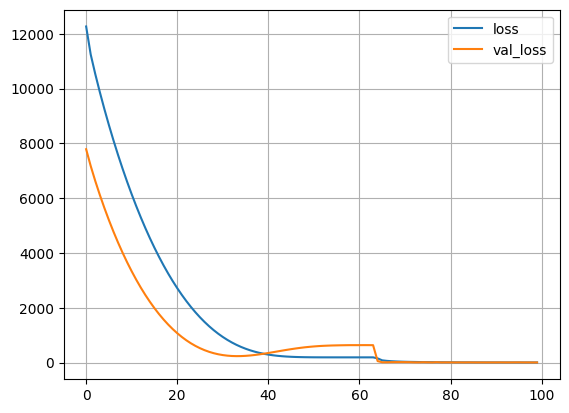

In [190]:
pd.DataFrame(run.history).plot()
plt.grid(True)
plt.show()

In [191]:
y_pred = model.predict(X_test)

55/55 [==============================] - 0s 3ms/step


In [192]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

movement_pred = X_test[:,-1] < y_pred.ravel()
a_score = accuracy_score(movement_test, movement_pred)
print(f"Accuracy of Movement Direction: {a_score}")

Mean Squared Error: 0.5928549652378918
Accuracy of Movement Direction: 0.49170005724098453


According to the above information, it is no overfitting.

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

**[Add your solution here]**

In [193]:
X_new, y_new = ts_split(ts,feature_steps=time_steps, target_steps=3)

X_train_3ahead = X_new[:(train_idx-2)]
y_train_3ahead = y_new[:(train_idx-2)]
X_valid_3ahead = X_new[(train_idx-2):(valid_idx-2)]
y_valid_3ahead = y_new[(train_idx-2):(valid_idx-2)]
X_test_3ahead = X_new[(valid_idx-2):]
y_test_3ahead = y_new[(valid_idx-2):]

In [194]:
reset_session()

In [195]:
model_new = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(3)
])

model_new.compile(loss="mse", optimizer="nadam")
run = model_new.fit(X_train_3ahead[..., np.newaxis],
                    y_train_3ahead[..., np.newaxis],
                    epochs=100,
                    validation_data=(X_valid_3ahead[..., np.newaxis],
                                     y_valid_3ahead[..., np.newaxis]))

Epoch 1/100
157/157 [==============================] - 3s 7ms/step - loss: 12603.8975 - val_loss: 8173.0054
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 11737.1641 - val_loss: 7572.9155
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 11027.9707 - val_loss: 7020.1963
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 10362.7568 - val_loss: 6501.9663
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 9732.3789 - val_loss: 6013.9204
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 9132.9365 - val_loss: 5553.2993
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 8562.0537 - val_loss: 5118.5117
Epoch 8/100
157/157 [==============================] - 1s 5ms/step - loss: 8017.9858 - val_loss: 4707.9185
Epoch 9/100
157/157 [==============================] - 1s 8ms/step - loss: 7499.4062 - val_loss: 4320.7900
Epoch 10/100
157/157 [===========

In [196]:
y_pred = model_new.predict(X_test_3ahead[..., np.newaxis])

55/55 [==============================] - 1s 4ms/step


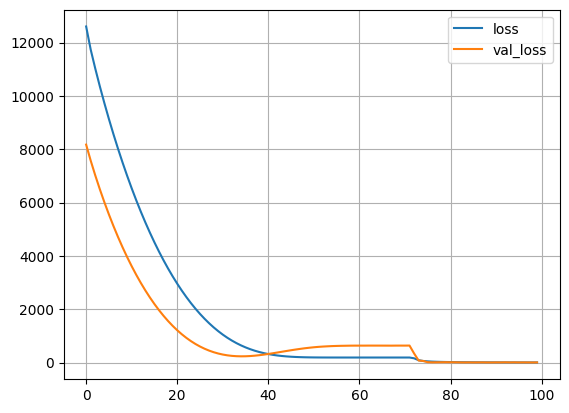

In [197]:
pd.DataFrame(run.history).plot()
plt.grid(True)
plt.show()

In [198]:
mse = mean_squared_error(y_test_3ahead, y_pred, multioutput="raw_values")
mse

array([0.57867664, 0.98727358, 1.40778023])

In [199]:
movement_test_1 = X_test_3ahead[:,-1] < y_test_3ahead[:,0]
movement_test_2 = X_test_3ahead[:,-1] < y_test_3ahead[:,1]
movement_test_3 = X_test_3ahead[:,-1] < y_test_3ahead[:,2]
movement_pred_1 = X_test_3ahead[:,-1] < y_pred[:,0]
movement_pred_2 = X_test_3ahead[:,-1] < y_pred[:,1]
movement_pred_3 = X_test_3ahead[:,-1] < y_pred[:,2]

In [200]:
print(accuracy_score(movement_test_1, movement_pred_1))
print(accuracy_score(movement_test_2, movement_pred_2))
print(accuracy_score(movement_test_3, movement_pred_3))

0.5088723526044648
0.4939896966227819
0.497424155695478


Here is no overfitting, and we can see 1-step ahead is the best.